In [5]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [12]:
vbf_sm_process = Process("vbf_sm", "VBFSM", color=(0, 0, 0))
vbf = Dataset("vbf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             vbf_sm_process,
             prefix="cmsxrootd-1.gridka.de:1094/")

latino = Dataset("lat",
                "/store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/",
                vbf_sm_process,
                prefix="eoscms.cern.ch/")

pprint(latino.get_files()[0:10])

['root://eoscms.cern.ch//store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/nanoLatino_2HDMa_HWWTollnunu_gg_sinp_0p35_tanb_0p5_mXd_10_MH3_300_MH4_150_MH2_300_MHC_300.root',
 'root://eoscms.cern.ch//store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/nanoLatino_2HDMa_HWWTollnunu_gg_sinp_0p35_tanb_1p0_mXd_10_MH3_200_MH4_150_MH2_200_MHC_200.root',
 'root://eoscms.cern.ch//store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/nanoLatino_2HDMa_HWWTollnunu_gg_sinp_0p35_tanb_1p0_mXd_10_MH3_300_MH4_150_MH2_300_MHC_300.root',
 'root://eoscms.cern.ch//store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_

In [9]:
ggf_sm_process = Process("ggf_sm", "GGFSM", color=(0, 0, 0))
ggf = Dataset("ggf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             ggf_sm_process,
             prefix="ingrid-se04.cism.ucl.ac.be:1094/")
# pprint(ggf.get_files()[0:])

In [ ]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:])

In [13]:
# lets plot stuff using ROOT RDataFrame
import ROOT
# ROOT.ROOT.EnableImplicitMT()
files = ggf.get_files()[0:1]
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

files = latino.get_files()[0:1]
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
lat_df = ROOT.RDataFrame("Events", dataframe_files)

In [4]:
print files

['root://ingrid-se04.cism.ucl.ac.be:1094//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root']


In [15]:
pprint ([col for col in lat_df.GetColumnNames() if col not in df.GetColumnNames()])

['nCleanJet',
 'CleanJet_jetIdx_JESup',
 'CleanJet_pt_JESup',
 'CleanJet_eta_JESup',
 'CleanJet_phi_JESup',
 'CleanJet_mass_JESup',
 'MET_pt_JESup',
 'MET_phi_JESup',
 'MET_sumEt_JESup',
 'PuppiMET_pt_JESup',
 'PuppiMET_phi_JESup',
 'PuppiMET_sumEt_JESup',
 'RawMET_pt_JESup',
 'RawMET_phi_JESup',
 'RawMET_sumEt_JESup',
 'mth_JESup',
 'mcoll_JESup',
 'mcollWW_JESup',
 'mTi_JESup',
 'choiMass_JESup',
 'mR_JESup',
 'mT2_JESup',
 'dphilljet_JESup',
 'dphilljetjet_JESup',
 'dphilljetjet_cut_JESup',
 'mtw1_JESup',
 'mtw2_JESup',
 'mjj_JESup',
 'detajj_JESup',
 'njet_JESup',
 'dphijet1met_JESup',
 'dphijet2met_JESup',
 'dphijjmet_JESup',
 'dphijjmet_cut_JESup',
 'dphilep1jet1_JESup',
 'dphilep1jet2_JESup',
 'dphilep2jet1_JESup',
 'dphilep2jet2_JESup',
 'mindetajl_JESup',
 'dphijj_JESup',
 'maxdphilepjj_JESup',
 'dphilep1jj_JESup',
 'dphilep2jj_JESup',
 'ht_JESup',
 'vht_pt_JESup',
 'vht_phi_JESup',
 'pTWW_JESup',
 'pTHjj_JESup',
 'recoil_JESup',
 'jetpt1_cut_JESup',
 'jetpt2_cut_JESup',
 'dph

In [11]:
print [col for col in df.GetColumnNames() if "deeptau" in col.lower()]

['Tau_rawDeepTau2017v2p1VSe', 'Tau_rawDeepTau2017v2p1VSjet', 'Tau_rawDeepTau2017v2p1VSmu', 'Tau_idDeepTau2017v2p1VSe', 'Tau_idDeepTau2017v2p1VSjet', 'Tau_idDeepTau2017v2p1VSmu']


# DeepTau

### Tau_idDeepTau2017v2p1VSmu

bitmask 1 = VLoose, 2 = Loose, 4 = Medium, 8 = Tight

This actually translates to
1 = VLoose, 3 = Loose, 7 = Medium, 15 = Tight

### Tau_idDeepTau2017v2p1VSe 

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255

### Tau_idDeepTau2017v2p1VSjet

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255


In [4]:
ROOT.gInterpreter.Declare("""
    bool is_wp(unsigned char v, int initial, int final){
         if ((int(v) >= int(std::pow(2, initial)) - 1) && (int(v) <= int(std::pow(2, final)) - 1)) return true;
         return false;
    }
""")

ROOT.gInterpreter.Declare("""
    using Vchar = const ROOT::RVec<unsigned char>&;
    ROOT::RVec<unsigned char> vec_wp(Vchar v, int initial, int final){
        ROOT::RVec<unsigned char> a;
        for (size_t i = 0; i < v.size(); i++) {
            if (is_wp(v[i], initial, final)) a.push_back(v[i]);
        }
        return a;
    }
""")

True

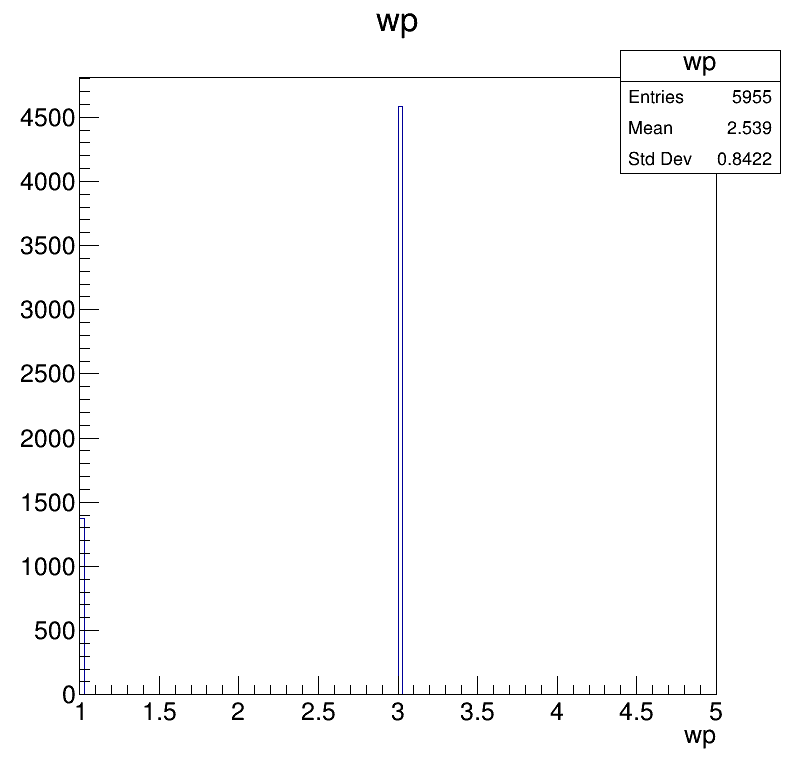

In [5]:
c = ROOT.TCanvas("", "", 800, 800)
#hist2 = df.Define("loose_vs_mu", 'wp(Tau_idDeepTau2017v2p1VSmu, (unsigned char*)("Loose"))').Histo1D("loose_vs_mu")
#new_df = df.Filter("Tau_idDeepTau2017v2p1VSmu[(Tau_idDeepTau2017v2p1VSmu & 3) > 0]")
histo3 = df.Define("wp","vec_wp(Tau_idDeepTau2017v2p1VSmu, 1, 2)").Histo1D("wp")
histo3.Draw()
c.Draw()

In [11]:
ROOT.gInterpreter.Declare("""
    using VBool = const ROOT::RVec<Bool_t>&;
    using Vint = const ROOT::RVec<int>&;
    ROOT::RVec<int> get_dm(Vint dm){
        ROOT::RVec<int> int_dm;
        for (int i = 0; i < dm.size(); i++){
            if (dm[i]) int_dm.push_back(1);
            else int_dm.push_back(0);
        }
        return int_dm;
    }
""")

False

In [12]:
c = ROOT.TCanvas("", "", 800, 800)
histo7 = df.Define("dm", "get_dm(Tau_idDecayModeNewDMs)").Histo1D("dm")
histo7.Draw()
c.Draw()

TypeError: can not resolve method template call for 'Define'

Error in <TClingCallFunc::make_wrapper>: Failed to compile
  ==== SOURCE BEGIN ====
#pragma clang diagnostic push
#pragma clang diagnostic ignored "-Wformat-security"
__attribute__((used)) extern "C" void __cf_37(void* obj, int nargs, void** args, void* ret)
{
   if (ret) {
      new (ret) (ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>) (((ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>*)obj)->Define(*(basic_string_view<char,char_traits<char> >*)args[0], *(basic_string_view<char,char_traits<char> >*)args[1]));
      return;
   }
   else {
      ((ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>*)obj)->Define(*(basic_string_view<char,char_traits<char> >*)args[0], *(basic_string_view<char,char_traits<char> >*)args[1]);
      return;
   }
}
#pragma clang diagnostic pop
  ==== SOURCE END ====

 *** Break *** segmentation violation



There was a crash.
This is the entire stack trace of all threads:

Thread 15 (Thread 0x7f64aa7fc700 (LWP 17503)):
#0  0x0

In [ ]:
ROOT.gSystem.Load("../HHKinFit2/libHHKinFit2.so")
ROOT.gInterpreter.Declare('#include "/afs/cern.ch/work/j/jleonhol/private/cms_phys_ciemat/analysis_tools/HHKinFit2/interface/HHKinFitMasterHeavyHiggs.h"')


In [6]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>;
    using Vint = const ROOT::RVec<int>;
    float gen_part_inv_mass(Vfloat inp_pt, Vfloat inp_eta, Vfloat inp_phi, Vfloat inp_mass, Vint inp_id, int id){
        ROOT::RVec<float> pt, eta, phi, mass;
        for (size_t i = 0; i < inp_pt.size(); i++) {
            if (abs(inp_id[i]) == id) {
                pt.push_back(inp_pt[i]);
                eta.push_back(inp_eta[i]);
                phi.push_back(inp_phi[i]);
                mass.push_back(inp_mass[i]);
            }
        }
        if (pt.size() != 2) return -1;
        return InvariantMass(pt, eta, phi, mass);
    }
""")

True

In [7]:
# invariant mass from the two taus
df_ditau = df.Filter("nGenVisTau == 2")
hmodel = ("Ditau_mass","Ditau Mass [GeV]",50, 0, 500.)
ditau_mass = df_ditau.Define("Ditau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "Ditau_mass")
digentau_mass = df_ditau.Define("Digentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "Digentau_mass")
digenparttau_mass = df_ditau.Define("Digenparttau_mass", "gen_part_inv_mass(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 15)").Histo1D(hmodel, "Digenparttau_mass")

In [6]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    float leading_pt(Vfloat pt){
        if (pt.size() < 1) return -1;
        if (pt.size() == 1) return pt[0];
        if (pt[1] > pt[0]) return pt[1];
        else return pt[0];
    }
    float subleading_pt(Vfloat pt){
        if (pt.size() < 2) return -1;
        if (pt[0] > pt[1]) return pt[1];
        else return pt[0];
    }
""")

True

In [7]:
hmodel = ("Leading_tau_pt","Leading_tau_pt [GeV]",25, 0, 200.)
lead_tau_pt = df_ditau.Define("lead_tau_pt", "leading_pt(Tau_pt)").Histo1D(hmodel, "lead_tau_pt")
lead_gentau_pt = df_ditau.Define("lead_gentau_pt", "leading_pt(GenVisTau_pt)").Histo1D(hmodel, "lead_gentau_pt")

hmodel = ("Subleading_tau_pt","subleading_tau_pt [GeV]",25, 0, 200.)
sublead_tau_pt = df_ditau.Define("sublead_tau_pt", "subleading_pt(Tau_pt)").Histo1D(hmodel, "sublead_tau_pt")
sublead_gentau_pt = df_ditau.Define("sublead_gentau_pt", "subleading_pt(GenVisTau_pt)").Histo1D(hmodel, "sublead_gentau_pt")


In [8]:
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> deltaRGenReco(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2){
        ROOT::RVec<float> deltaR;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                deltaR.push_back(fabs(v1.DeltaR(v2)));
            }
        }
        return deltaR;
    }
""")

True

In [9]:
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 5.)
deltar_gen_reco = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 0.1)
deltar_gen_reco_zoomed = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")


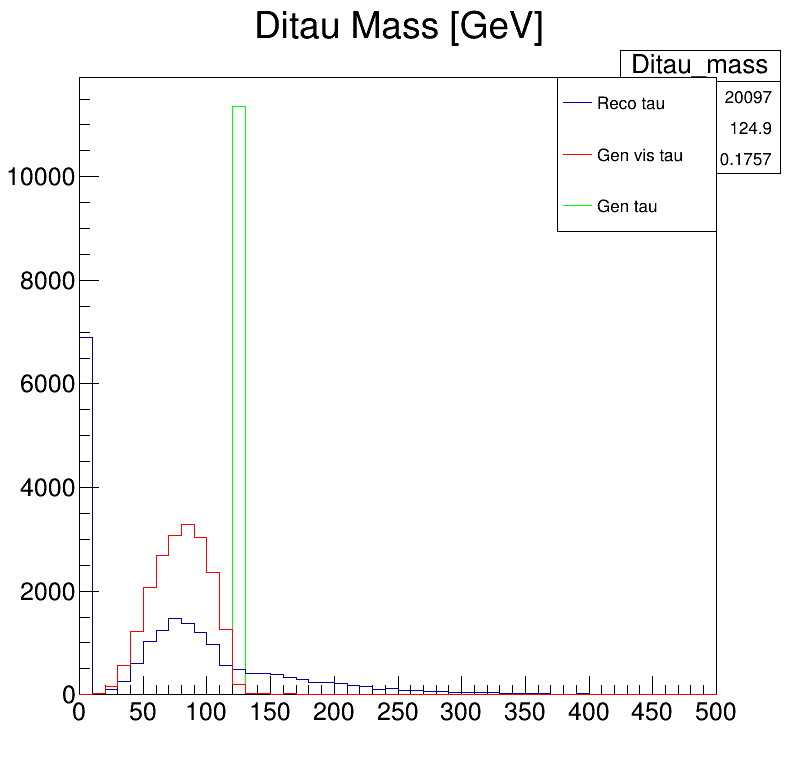

In [10]:
# invariant mass from the two taus
c = ROOT.TCanvas("", "", 800, 800)

h3 = digenparttau_mass.Clone()
h3.SetLineColor(ROOT.kGreen)
h3.Draw("same")

h1 = ditau_mass.Clone()
h1.Draw("same")
h2 = digentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")




leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Gen vis tau", "l")
leg.AddEntry(h3, "Gen tau", "l")

leg.Draw("same")
c.Draw()

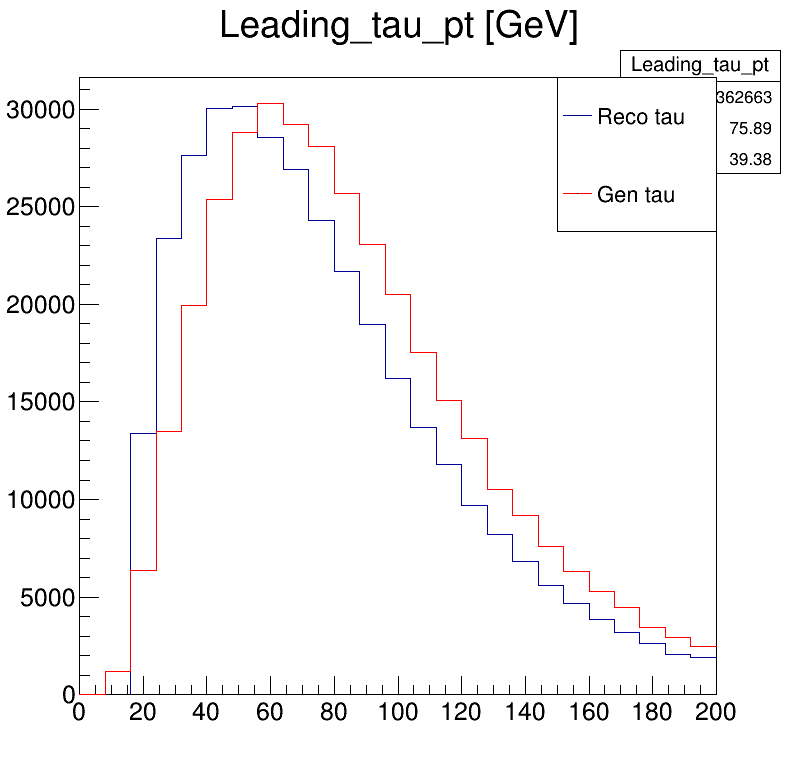

In [14]:
# leading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = lead_tau_pt.Clone()
h1.Draw()
h2 = lead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

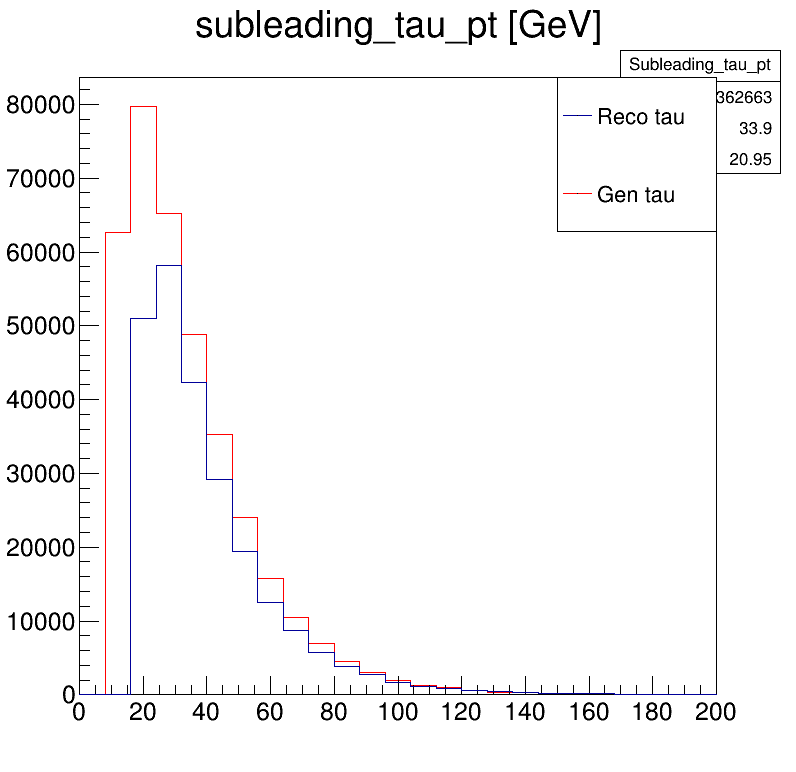

In [15]:
# subleading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = sublead_tau_pt.Clone()

h2 = sublead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw()
    h2.Draw("same")
else:
    h2.Draw()
    h1.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

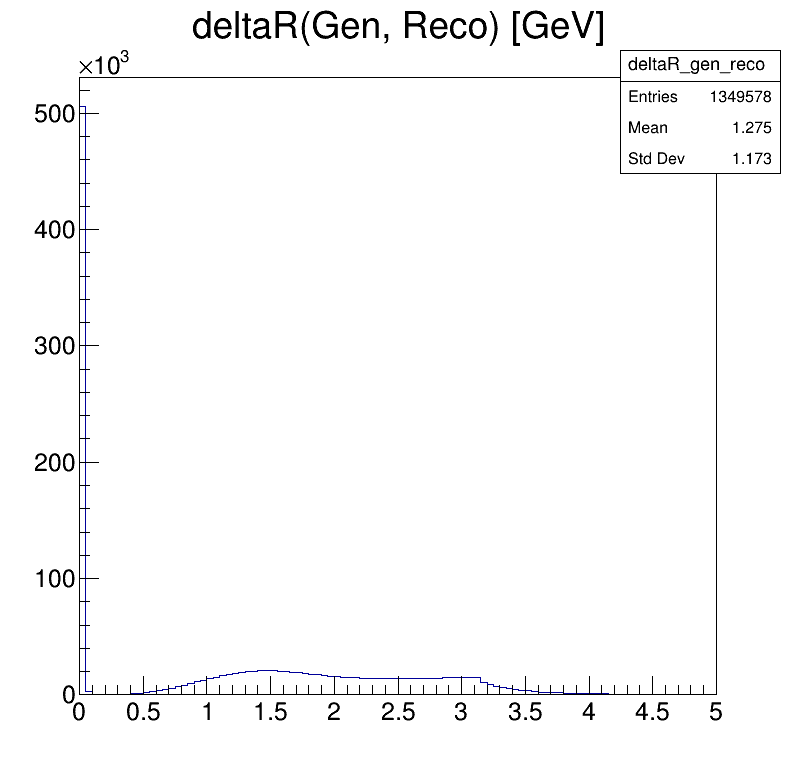

In [16]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco.Clone()
h1.Draw()
c.Draw()

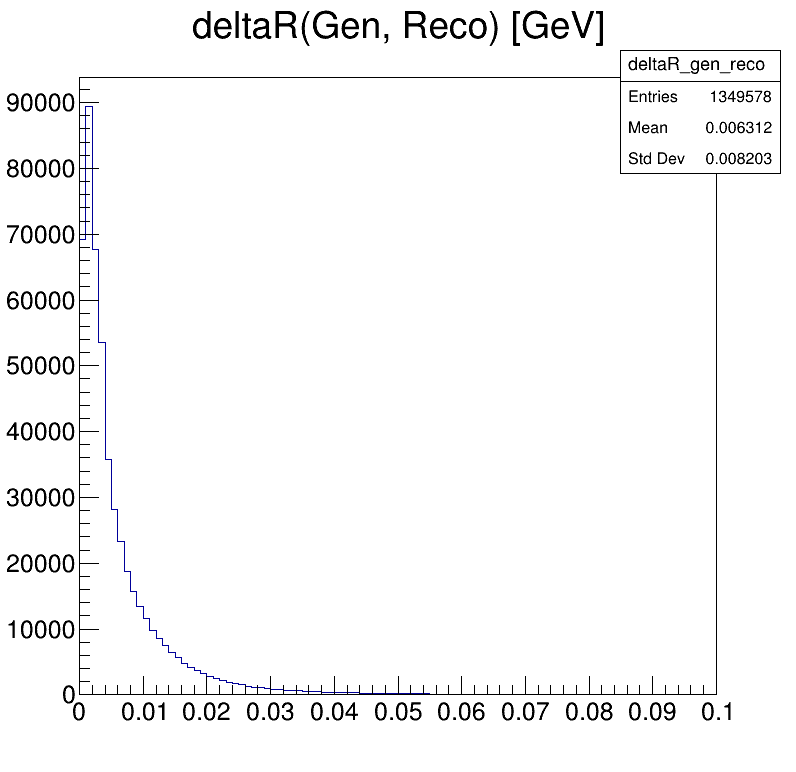

In [17]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_zoomed.Clone()
h1.Draw()
c.Draw()

In [10]:
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt
# let's define a function that returns the efficient pts
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> efficient_gen_pts(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2){
        ROOT::RVec<float> efficient_pts;
        int used_j = -1;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                if (j == used_j) continue;
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < 0.1) {
                  efficient_pts.push_back(pt1[i]);
                  used_j = j;
                  break;
                }
            }
        }
        return efficient_pts;
    }
""")


True

In [11]:
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_gen_pts = df_ditau.Define("efficient_gen_pts", "efficient_gen_pts(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "efficient_gen_pts")
all_gen_pts = df_ditau.Histo1D(hmodel, "GenVisTau_pt")

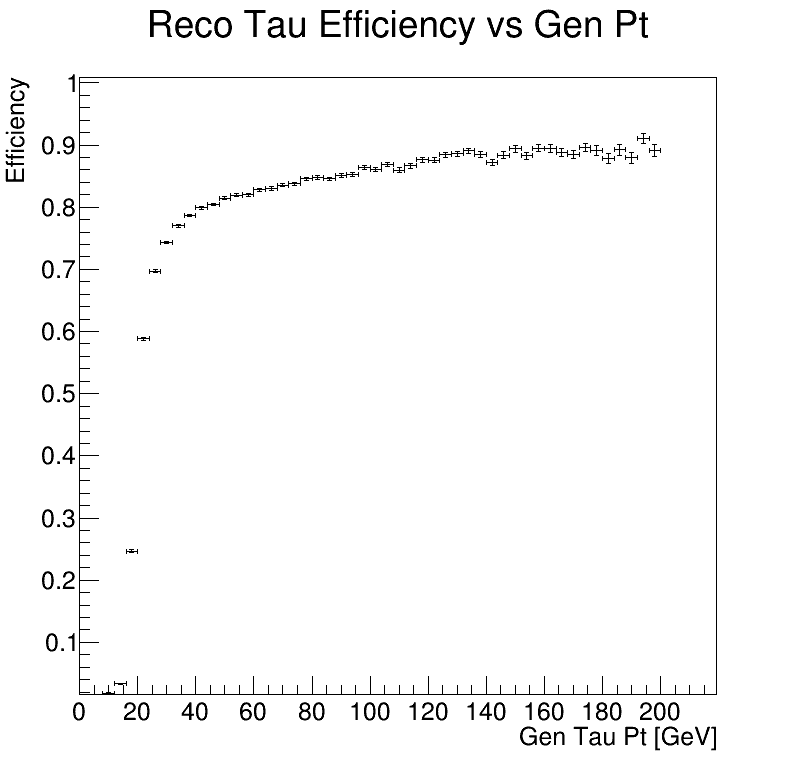

In [12]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_pts.Clone()
h2 = all_gen_pts.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetTitle("Reco Tau Efficiency vs Gen Pt; Gen Tau Pt [GeV]; Efficiency")
eff.Draw()
# h2.Draw()
# h1.Draw("same")
c.Draw()